In [1]:
import json
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv1D, MaxPooling1D, Flatten, LSTM,
                                     Dense, concatenate, Reshape, BatchNormalization, Dropout)
from tensorflow.keras.regularizers import l2
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
json_file_path = r"C:\Users\Malik Haider\Documents\NewHumCare\JSON_FALL\train_data_fall.json"  # Update the path if necessary

with open(json_file_path, 'r') as json_file:
    data = json.load(json_file)

print("File loaded successfully!")

File loaded successfully!


In [3]:
df = pd.DataFrame(data)

In [7]:
feature_dimension = 1
num_classes = 8
num_features = 6
flatten_size = 10

y_train = np.array(df['Y_train'])
X_features = [np.expand_dims(np.array(df[col].to_list()), axis=-1) for col in df.columns[:-1]]


In [9]:
unique_labels, counts = np.unique(y_train, return_counts=True)
print("Unique labels and counts:", unique_labels, counts)

Unique labels and counts: [0 1 2 3 4 5 6 7] [285 300 311 292 301 298 291 298]


In [56]:
# input_layers = []
# cnn_outputs = []

# for feature in df.columns[:-1]:
#     length = df[feature].apply(len)[0]
#     input_layer = Input(shape=(length, 1))
#     input_layers.append(input_layer)

#     x = Conv1D(32, kernel_size=3, activation='relu', kernel_regularizer=l2(0.001))(input_layer)
#     x = MaxPooling1D(pool_size=2)(x)
#     x = Conv1D(16, kernel_size=3, activation='relu', kernel_regularizer=l2(0.001))(x)
#     x = MaxPooling1D(pool_size=2)(x)
#     x = Flatten()(x)
#     x = Dense(flatten_size, activation='relu', kernel_regularizer=l2(0.001))(x)
#     cnn_outputs.append(x)

In [11]:
# merged_cnn = concatenate(cnn_outputs)
# reshaped = Reshape((num_features, -1))(merged_cnn)

# x = LSTM(128, return_sequences=True, kernel_regularizer=l2(0.001))(reshaped)
# x = LSTM(64, kernel_regularizer=l2(0.001))(x)

# x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
# output = Dense(num_classes, activation='softmax')(x)


In [ ]:
# model = Model(inputs=input_layers, outputs=output)
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# print(model.summary())

# history_l2 = model.fit(X_features, y_train, epochs=200, batch_size=32, validation_split=0.2)


In [ ]:
# plt.figure(figsize=(12, 6))
# plt.plot(history_l2.history['accuracy'], label='Train Accuracy')
# plt.plot(history_l2.history['val_accuracy'], label='Val Accuracy')
# plt.title('L2 Regularization - Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.savefig('L2 Accuracy.jpg')
# plt.show()

In [ ]:
# plt.figure(figsize=(12, 6))
# plt.plot(history_l2.history['loss'], label='Train Loss')
# plt.plot(history_l2.history['val_loss'], label='Val Loss')
# plt.title('L2 Regularization - Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.savefig('L2 Loss.jpg')
# plt.show()

In [ ]:
# input_layers = []
# cnn_outputs = []

# for feature in df.columns[:-1]:
#     length = df[feature].apply(len)[0]
#     input_layer = Input(shape=(length, 1))
#     input_layers.append(input_layer)

#     x = Conv1D(32, kernel_size=3, activation='relu', kernel_regularizer=l2(0.001))(input_layer)
#     x = BatchNormalization()(x)
#     x = MaxPooling1D(pool_size=2)(x)

#     x = Conv1D(16, kernel_size=3, activation='relu', kernel_regularizer=l2(0.001))(x)
#     x = BatchNormalization()(x)
#     x = MaxPooling1D(pool_size=2)(x)

#     x = Flatten()(x)
#     x = Dense(flatten_size, activation='relu', kernel_regularizer=l2(0.001))(x)
#     cnn_outputs.append(x)

# merged = concatenate(cnn_outputs)
# reshaped = Reshape((num_features, -1))(merged)

# x = LSTM(128, return_sequences=True, kernel_regularizer=l2(0.001))(reshaped)
# x = LSTM(64, kernel_regularizer=l2(0.001))(x)

# x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
# output = Dense(num_classes, activation='softmax')(x)

# model_bn = Model(inputs=input_layers, outputs=output)
# model_bn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model_bn.summary()


In [ ]:
# history_bn = model_bn.fit(X_features, y_train, epochs=200, batch_size=32, validation_split=0.2)

In [ ]:
# # Accuracy
# plt.figure(figsize=(12, 6))
# plt.plot(history_bn.history['accuracy'], label='Train Accuracy')
# plt.plot(history_bn.history['val_accuracy'], label='Val Accuracy')
# plt.title('BatchNorm + L2 - Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.savefig('Batch Accuracy.jpg')
# plt.show()

# # Loss
# plt.figure(figsize=(12, 6))
# plt.plot(history_bn.history['loss'], label='Train Loss')
# plt.plot(history_bn.history['val_loss'], label='Val Loss')
# plt.title('BatchNorm + L2 - Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.savefig('Batch Loss.jpg')
# plt.show()

In [11]:
input_layers = []
cnn_outputs = []

for feature in df.columns[:-1]:
    length = df[feature].apply(len)[0]
    input_layer = Input(shape=(length, 1))
    input_layers.append(input_layer)

    x = Conv1D(32, kernel_size=3, activation='relu', kernel_regularizer=l2(0.001))(input_layer)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)

    x = Conv1D(16, kernel_size=3, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)

    x = Flatten()(x)
    x = Dense(flatten_size, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = Dropout(0.3)(x)
    cnn_outputs.append(x)

merged = concatenate(cnn_outputs)
reshaped = Reshape((num_features, -1))(merged)

x = LSTM(128, return_sequences=True, kernel_regularizer=l2(0.001))(reshaped)
x = Dropout(0.3)(x)
x = LSTM(64, kernel_regularizer=l2(0.001))(x)
x = Dropout(0.3)(x)

x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.3)(x)
output = Dense(num_classes, activation='softmax')(x)

model_dp = Model(inputs=input_layers, outputs=output)
model_dp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_dp.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 1200, 1)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 5880, 1)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 1200, 1)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 1176, 1)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_4       │ (None, 1176, 1)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_5       │ (None, 1176, 1)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 1198, 32)  │        128 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 5878, 32)  │        128 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 1198, 32)  │        128 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_6 (Conv1D)   │ (None, 1174, 32)  │        128 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_8 (Conv1D)   │ (None, 1174, 32)  │        128 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_10 (Conv1D)  │ (None, 1174, 32)  │        128 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 1198, 32)  │        128 │ conv1d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 5878, 32)  │        128 │ conv1d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1198, 32)  │        128 │ conv1d_4[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1174, 32)  │        128 │ conv1d_6[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1174, 32)  │        128 │ conv1d_8[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1174, 32)  │        128 │ conv1d_10[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 599, 32)   │          0 │ batch_normalizat

 Total params: 611,620 (2.33 MB)

 Trainable params: 611,044 (2.33 MB)

 Non-trainable params: 576 (2.25 KB)

In [13]:
history_dp = model_dp.fit(X_features, y_train, epochs=300, batch_size=32, validation_split=0.2)

Epoch 1/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 37s 373ms/step - accuracy: 0.2714 - loss: 2.3475 - val_accuracy: 0.6282 - val_loss: 1.4372
Epoch 2/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 364ms/step - accuracy: 0.5730 - loss: 1.4872 - val_accuracy: 0.6471 - val_loss: 1.3093
Epoch 3/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 23s 377ms/step - accuracy: 0.6425 - loss: 1.2504 - val_accuracy: 0.6828 - val_loss: 1.1776
Epoch 4/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 23s 377ms/step - accuracy: 0.6846 - loss: 1.1286 - val_accuracy: 0.6870 - val_loss: 1.1169
Epoch 5/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 23s 386ms/step - accuracy: 0.7023 - loss: 1.0640 - val_accuracy: 0.7290 - val_loss: 1.0727
Epoch 6/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 354ms/step - accuracy: 0.6952 - loss: 1.0484 - val_accuracy: 0.7248 - val_loss: 1.0635
Epoch 7/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 347ms/step - accuracy: 0.7589 - loss: 0.9487 - val_accuracy: 0.7626 - val_loss: 1.0573
Epoch 8/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 343ms/step - accuracy: 0.7692 - loss: 0.9184 - 

In [17]:
import pickle

# Save the training history from history_dp
with open('training_history_dp.pkl', 'wb') as f:
    pickle.dump(history_dp.history, f)

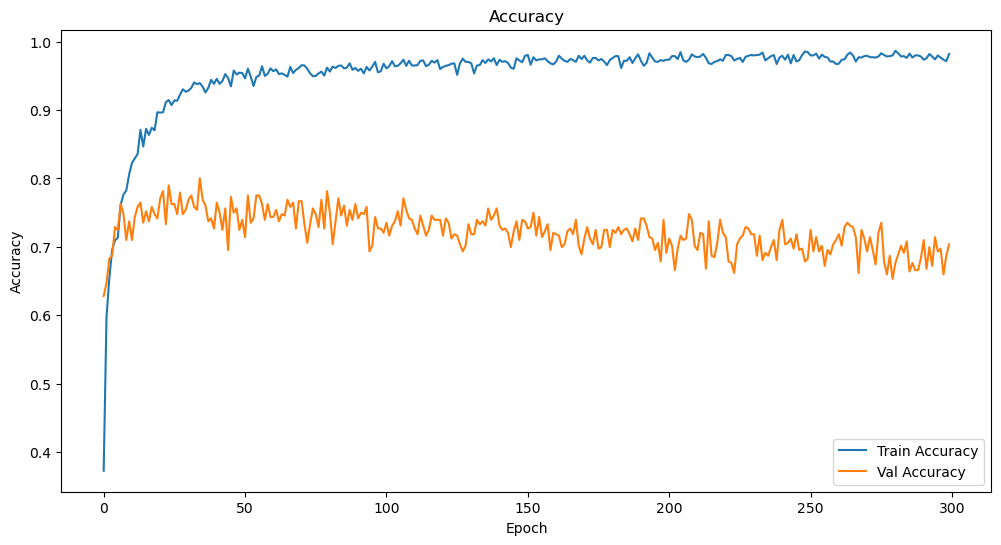

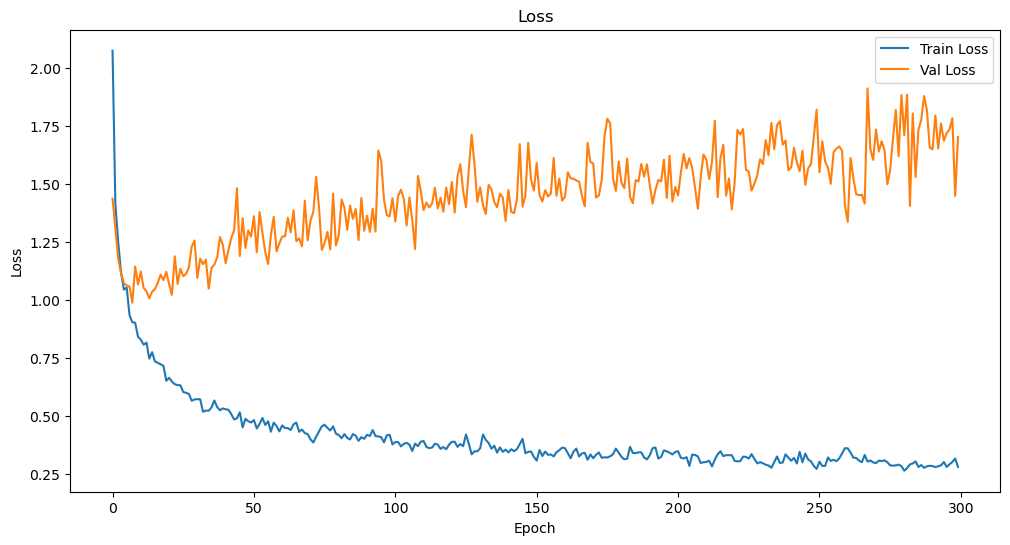

In [19]:
# Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history_dp.history['accuracy'], label='Train Accuracy')
plt.plot(history_dp.history['val_accuracy'], label='Val Accuracy')
#plt.title('Dropout + BatchNorm + L2 - Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Dropout Accuracy.jpg')
plt.show()

# Loss
plt.figure(figsize=(12, 6))
plt.plot(history_dp.history['loss'], label='Train Loss')
plt.plot(history_dp.history['val_loss'], label='Val Loss')
#plt.title('Dropout + BatchNorm + L2 - Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Dropout Loss.jpg')
plt.show()

In [21]:
import pickle

# Load the training history
with open('training_history_dp.pkl', 'rb') as f:
    history_dict = pickle.load(f)

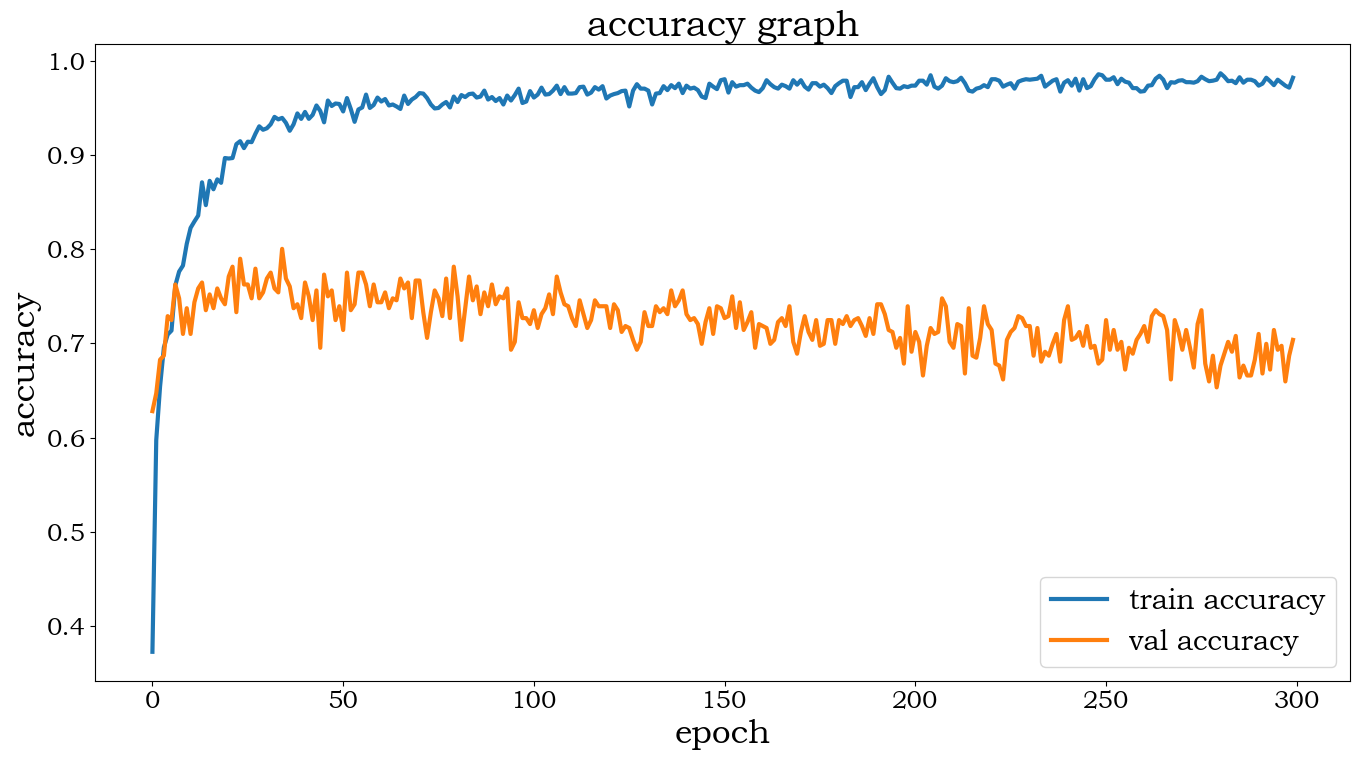

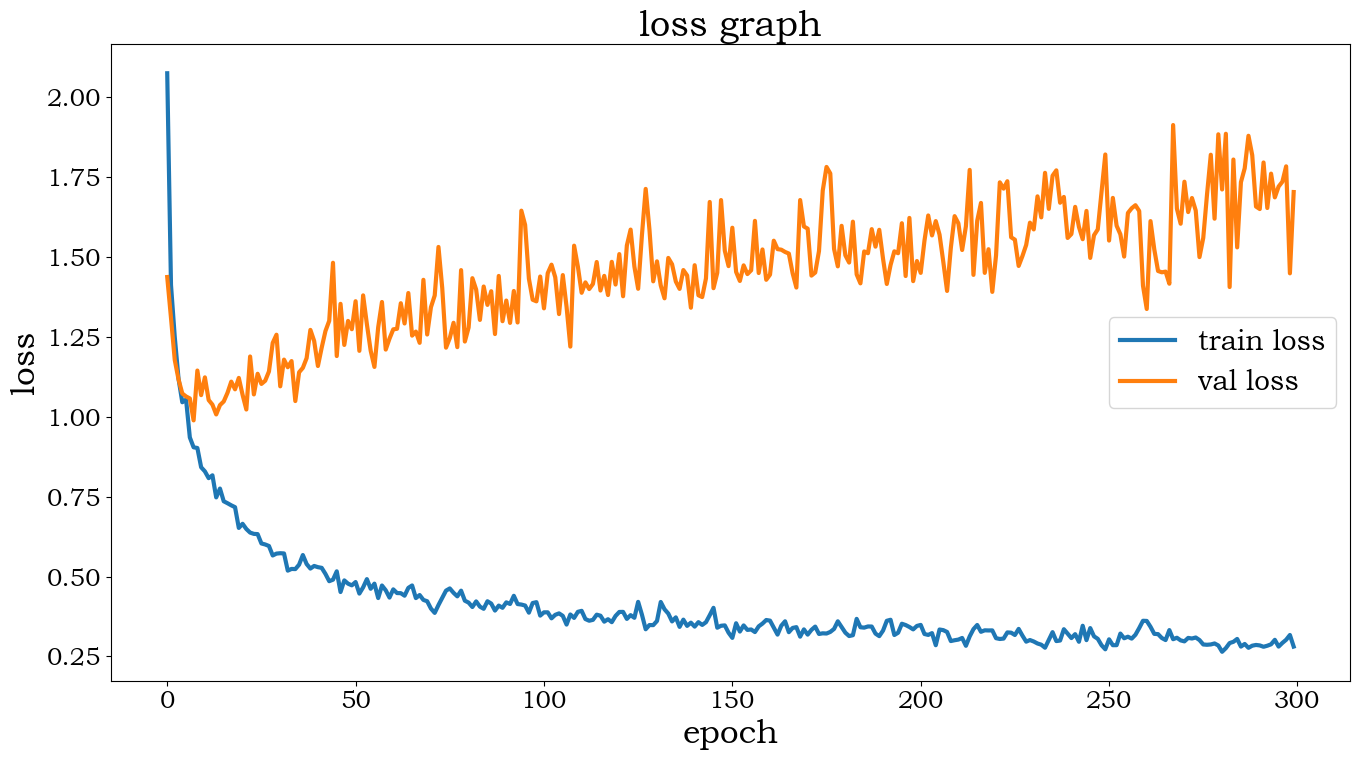

In [27]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Load Bookman Old Style Light
font_path = r"C:\Users\Malik Haider\AppData\Local\Microsoft\Windows\Fonts\BOOKOS.TTF"  # Update if needed
bookman_font = fm.FontProperties(fname=font_path)

# Set global plot styles
plt.rcParams.update({
    'font.size': 20,
    'axes.titlesize': 26,
    'axes.labelsize': 24,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'legend.fontsize': 20,
    'lines.linewidth': 3,
    'font.family': bookman_font.get_name()
})

# --- Accuracy Plot ---
plt.figure(figsize=(14, 8))
plt.plot(history_dict['accuracy'], label='train accuracy')
plt.plot(history_dict['val_accuracy'], label='val accuracy')
plt.title('accuracy graph')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.tight_layout()
plt.savefig(r'C:\Users\Malik Haider\Downloads\Model_Results_Fall\dropout_accuracy_highres.jpg', dpi=600)
plt.show()

# --- Loss Plot ---
plt.figure(figsize=(14, 8))
plt.plot(history_dict['loss'], label='train loss')
plt.plot(history_dict['val_loss'], label='val loss')
plt.title('loss graph')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.tight_layout()
plt.savefig(r'C:\Users\Malik Haider\Downloads\Model_Results_Fall\dropout_loss_highres.jpg', dpi=600)
plt.show()

In [25]:
model_dp.save(r'C:\Users\Malik Haider\Downloads\Model_Results_Fall\trainedModel_July1.keras')

In [ ]:
del df
del data
del X_features
del y_train

In [72]:
# **Loading the Trained Model to Test over Test data**

In [50]:
model_dp = tf.keras.models.load_model(r'C:\Users\Malik Haider\Documents\NewHumCare\Model_Results_200_Epochs\trainedModel_June15.keras')

In [52]:
# Path to your test JSON file
test_json_file_path = r"C:\Users\Malik Haider\Documents\NewHumCare\JSON_FALL\test_data.json"  # Update path accordingly

# Load test data
with open(test_json_file_path, 'r') as json_file:
    test_data = json.load(json_file)

# Convert test data to DataFrame
import pandas as pd
df_test = pd.DataFrame(test_data)

# Extract features
X_test_features = [np.array(df_test[column].to_list()) for column in df_test.columns[:-1]]  # Assuming last column is Y_test

# Extract ground truth labels (if available)
y_test = np.array(df_test['Y_train'])  # Update based on your actual test label column

In [54]:
# df_test.head()
unique_labels, counts = np.unique(y_test, return_counts=True)
print("Unique labels and counts:", unique_labels, counts)
print(y_test)

Unique labels and counts: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29] [ 49 164  42  47  38  46  43 194 178  42 187  44  48  44  53  41  51 178
 192  51 193  52  44  53 195 154  45 177  40 178]
[10  9 29 ... 18 10 24]


In [56]:
# Get model predictions
y_pred_probs = model_dp.predict(X_test_features)

# Convert softmax probabilities to class predictions
predicted_classes = np.argmax(y_pred_probs, axis=1)

90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step


In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)
print('Confusion Matrix:')
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, predicted_classes)
print(f'Accuracy: {accuracy}')

# Precision
precision = precision_score(y_test, predicted_classes, average='macro')
print(f'Precision: {precision}')

# Recall
recall = recall_score(y_test, predicted_classes, average='macro')
print(f'Recall: {recall}')

# F1-Score
f1 = f1_score(y_test, predicted_classes, average='macro')
print(f'F1-Score: {f1}')

Confusion Matrix:
[[ 41   0   0   0   0   0   0   0   0   0   0   1   4   0   0   0   0   0
    0   0   0   0   0   0   1   1   1   0   0   0]
 [  0 159   3   0   0   0   0   0   0   0   0   1   0   1   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2  34   0   0   0   0   0   0   0   0   0   0   6   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  44   0   0   1   0   0   1   0   0   0   0   0   0   0   1
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  30   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   1   0   0   1   0   0   0   0   0   6]
 [  0   0   0   0   0  45   0   0   0   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   6  36   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 111   0   0   0   0   0   0   0   0   0   0
    0   0   2   0   0   0   0   0

In [60]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Map class numbers to activity names
label_to_activity = {
    0: 'bending', 1: 'clean_the_table', 2: 'close_door', 3: 'close_lid_by_rotation',
    4: 'downstairs', 5: 'drink_water', 6: 'eat_small_thing', 7: 'fast_walk',
    8: 'jogging', 9: 'laying_down_from_sitting', 10: 'laying', 11: 'open_bag',
    12: 'open_big_box', 13: 'open_door', 14: 'pick_from_floor', 15: 'plug_in',
    16: 'put_on_the_floor', 17: 'reading', 18: 'sitting', 19: 'sit_down',
    20: 'slow_walk', 21: 'squatting', 22: 'standing_up_from_laying',
    23: 'standing_up_from_sitting', 24: 'standing', 25: 'talk_using_phone',
    26: 'throw_out', 27: 'typing', 28: 'upstairs', 29: 'walking'
}

# Convert labels to activity names
y_test_named = [label_to_activity[label] for label in y_test]
predicted_named = [label_to_activity[label] for label in predicted_classes]

# Generate classification report and confusion matrix
report = classification_report(
    y_test_named, predicted_named,
    labels=list(label_to_activity.values()),
    output_dict=True,
    zero_division=0
)

cm_labels = list(label_to_activity.values())
cm = confusion_matrix(y_test_named, predicted_named, labels=cm_labels)

# Calculate per-class metrics
rows = []
for idx, label in enumerate(cm_labels):
    tp = cm[idx][idx]
    total = cm[idx].sum()
    acc = tp / total if total != 0 else 0

    metrics = report[label]
    rows.append({
        'Label': list(label_to_activity.keys())[idx],
        'Activity': label,
        'Accuracy': round(acc, 4),
        'Precision': round(metrics['precision'], 4),
        'Recall': round(metrics['recall'], 4),
        'F1-Score': round(metrics['f1-score'], 4)
    })

# Create DataFrame
df = pd.DataFrame(rows)

# Compute average values
average_row = {
    'Label': '',
    'Activity': 'Average',
    'Accuracy': round(df['Accuracy'].mean(), 4),
    'Precision': round(df['Precision'].mean(), 4),
    'Recall': round(df['Recall'].mean(), 4),
    'F1-Score': round(df['F1-Score'].mean(), 4)
}

# Append average row to DataFrame
df = pd.concat([df, pd.DataFrame([average_row])], ignore_index=True)

# Print DataFrame
print(df)

# Optional: Save to CSV
# df.to_csv(r'C:\Users\Malik Haider\Downloads\Model_Results\per_class_metrics_with_average.csv', index=False)


   Label                  Activity  Accuracy  Precision  Recall  F1-Score
0      0                   bending    0.8367     0.9535  0.8367    0.8913
1      1           clean_the_table    0.9695     0.9815  0.9695    0.9755
2      2                close_door    0.8095     0.8095  0.8095    0.8095
3      3     close_lid_by_rotation    0.9362     0.9565  0.9362    0.9462
4      4                downstairs    0.7895     0.8824  0.7895    0.8333
5      5               drink_water    0.9783     0.8824  0.9783    0.9278
6      6           eat_small_thing    0.8372     0.7500  0.8372    0.7912
7      7                 fast_walk    0.5722     0.7762  0.5722    0.6588
8      8                   jogging    1.0000     0.9889  1.0000    0.9944
9      9  laying_down_from_sitting    0.9286     0.9286  0.9286    0.9286
10    10                    laying    1.0000     0.9947  1.0000    0.9973
11    11                  open_bag    0.7727     0.9189  0.7727    0.8395
12    12              open_big_box    

In [62]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_classes)
print(f"Test Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred_probs))

Test Accuracy: 0.86


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

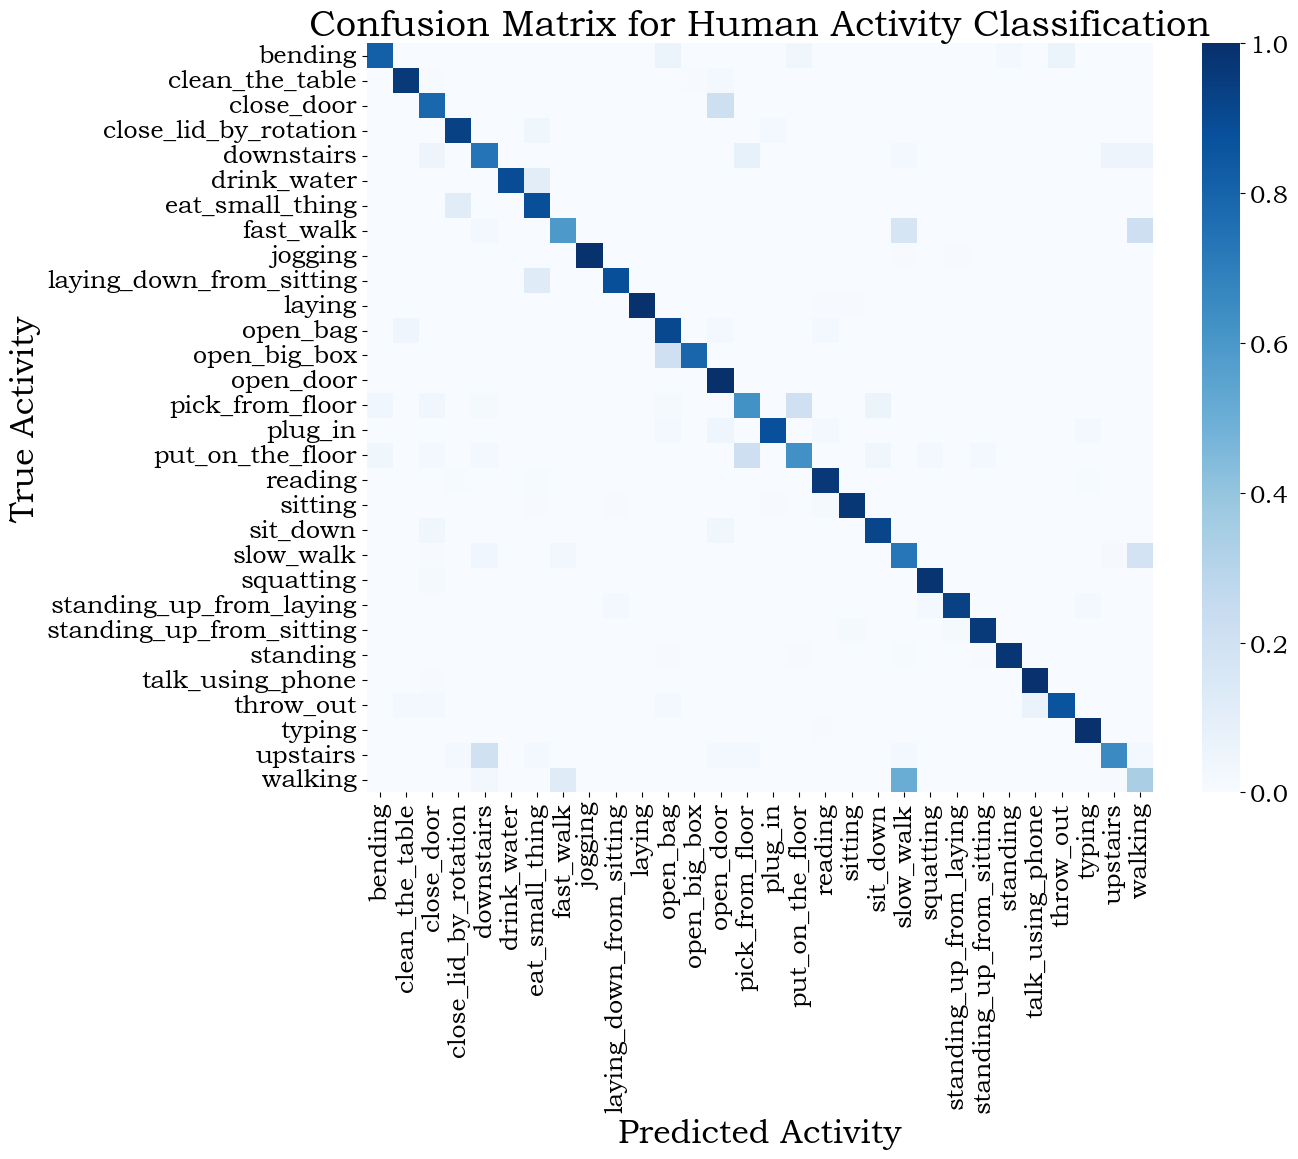

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming conf_matrix is already computed
# conf_matrix = confusion_matrix(y_test, predicted_classes)

# Define activity labels (in the correct order as per label index)
activity_names = [
    'bending', 'clean_the_table', 'close_door', 'close_lid_by_rotation',
    'downstairs', 'drink_water', 'eat_small_thing', 'fast_walk',
    'jogging', 'laying_down_from_sitting', 'laying', 'open_bag',
    'open_big_box', 'open_door', 'pick_from_floor', 'plug_in',
    'put_on_the_floor', 'reading', 'sitting', 'sit_down',
    'slow_walk', 'squatting', 'standing_up_from_laying',
    'standing_up_from_sitting', 'standing', 'talk_using_phone',
    'throw_out', 'typing', 'upstairs', 'walking'
]

# Normalize the confusion matrix (optional)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(
    conf_matrix_normalized, 
    annot=False, 
    cmap='Blues',
    xticklabels=activity_names,
    yticklabels=activity_names,
    cbar=True,
    vmin=0, vmax=1
)

plt.title('Confusion Matrix for Human Activity Classification')
plt.xlabel('Predicted Activity')
plt.ylabel('True Activity')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(r'C:\Users\Malik Haider\Downloads\Model_Results\CM_with_labels_New.jpg')
plt.show()

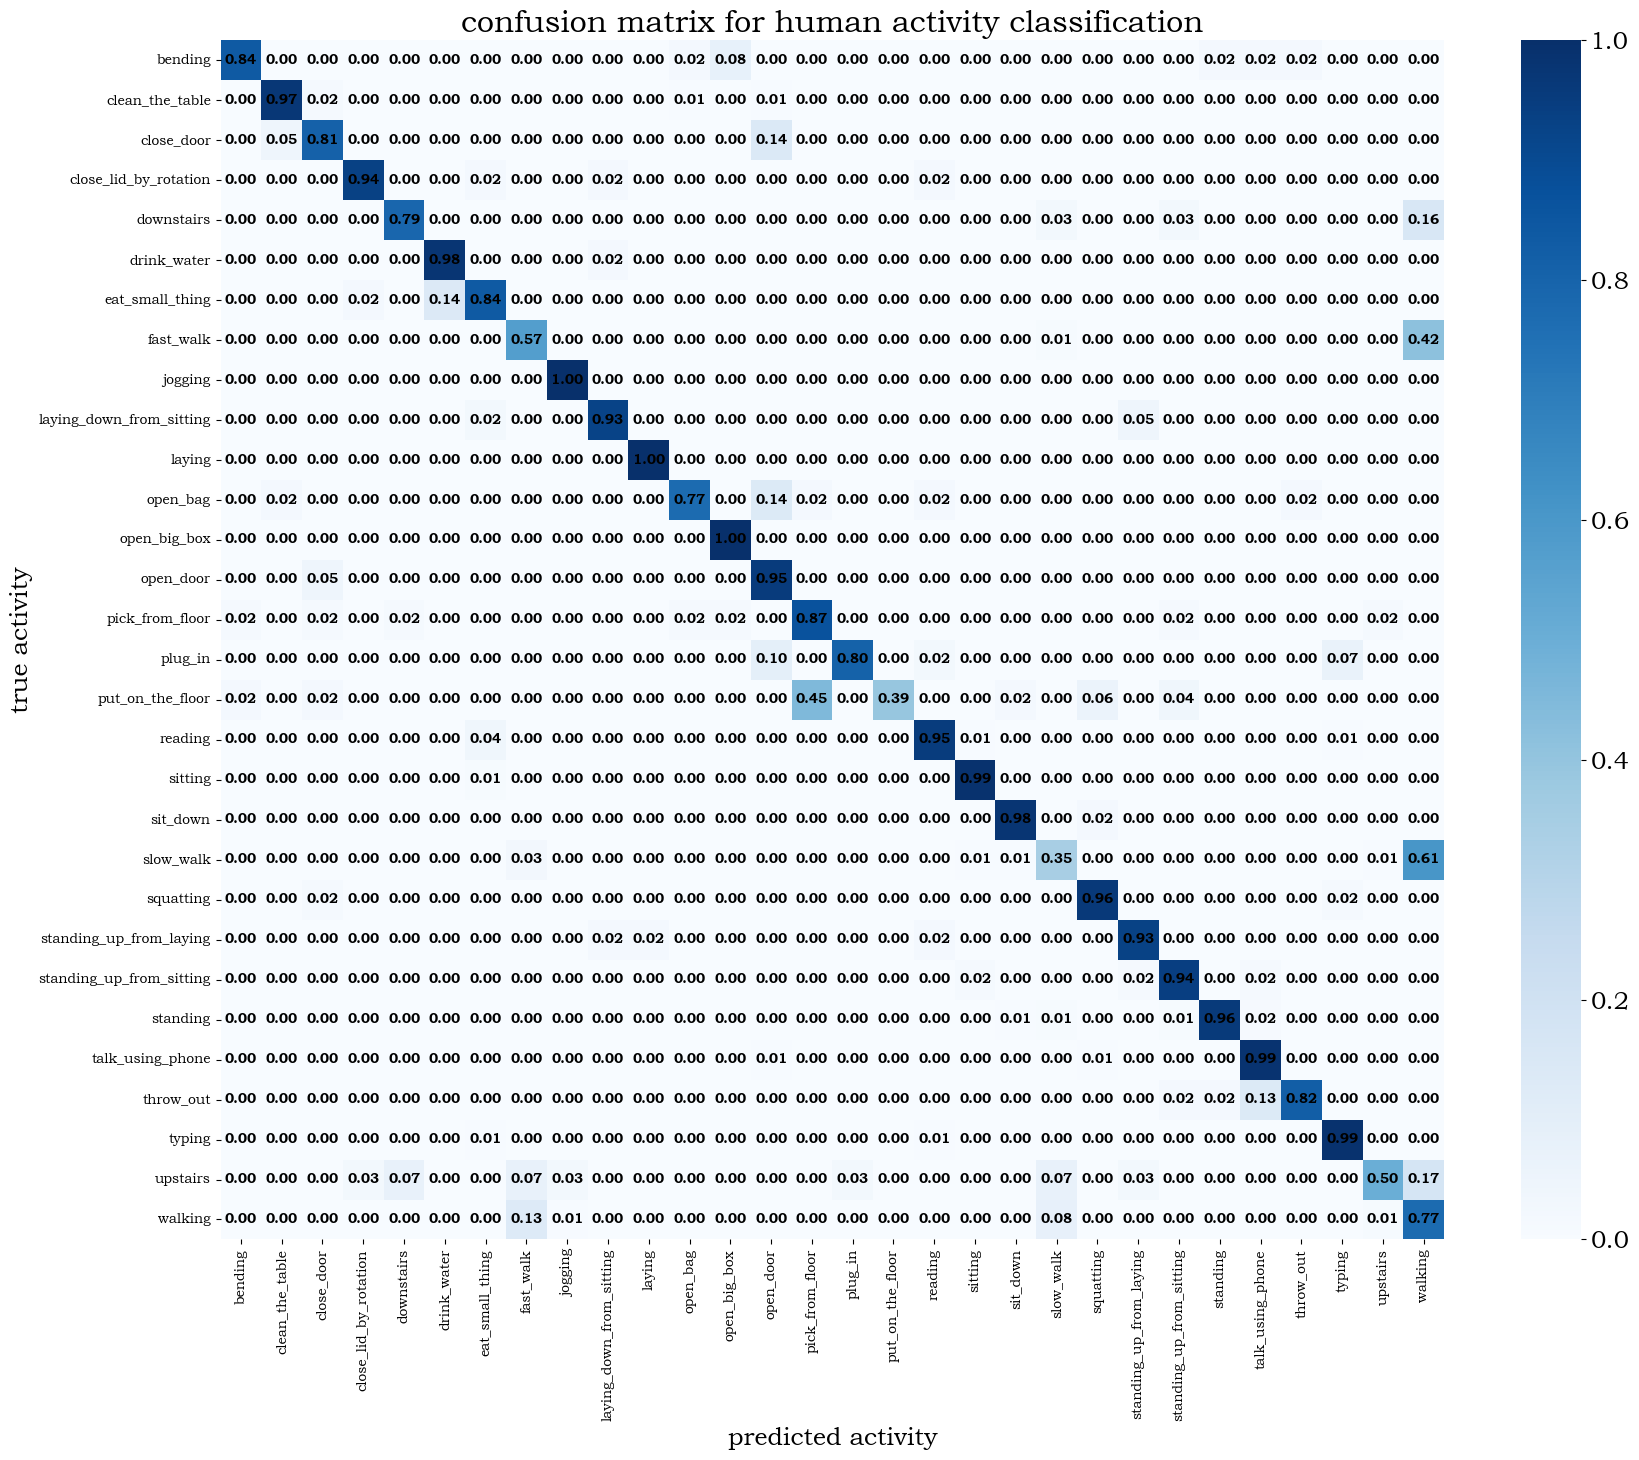

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.font_manager as fm

# Load Bookman Old Style if available from custom path
font_path = r'C:\Users\Malik Haider\AppData\Local\Microsoft\Windows\Fonts\BOOKOS.TTF'
try:
   bookman_font = fm.FontProperties(fname=font_path)
except:
   bookman_font = None  # Fallback if not found

font_path = r"C:\Users\Malik Haider\AppData\Local\Microsoft\Windows\Fonts\BOOKOS.TTF"  # Update if needed
bookman_font = fm.FontProperties(fname=font_path)

# Define activity labels
activity_names = [
    'bending', 'clean_the_table', 'close_door', 'close_lid_by_rotation',
    'downstairs', 'drink_water', 'eat_small_thing', 'fast_walk',
    'jogging', 'laying_down_from_sitting', 'laying', 'open_bag',
    'open_big_box', 'open_door', 'pick_from_floor', 'plug_in',
    'put_on_the_floor', 'reading', 'sitting', 'sit_down',
    'slow_walk', 'squatting', 'standing_up_from_laying',
    'standing_up_from_sitting', 'standing', 'talk_using_phone',
    'throw_out', 'typing', 'upstairs', 'walking'
]

# Normalize confusion matrix
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix with annotations
plt.figure(figsize=(18, 15))
ax = sns.heatmap(
    conf_matrix_normalized,
    annot=True,                # Show numbers
    fmt=".2f",                 # 2 decimal places
    cmap='Blues',
    xticklabels=activity_names,
    yticklabels=activity_names,
    cbar=True,
    vmin=0, vmax=1,
    annot_kws={"size": 10, "color": "black", "weight": "bold"}  # Annot text style
)

# Font styling
if bookman_font:
    plt.title('confusion matrix for human activity classification', fontproperties=bookman_font, fontsize=22)
    plt.xlabel('predicted activity', fontproperties=bookman_font, fontsize=18)
    plt.ylabel('true activity', fontproperties=bookman_font, fontsize=18)
    ax.set_xticklabels(activity_names, fontproperties=bookman_font, fontsize=10, rotation=90)
    ax.set_yticklabels(activity_names, fontproperties=bookman_font, fontsize=10, rotation=0)
else:
    plt.title('confusion matrix for human activity classification', fontsize=22, fontname='serif')
    plt.xlabel('predicted activity', fontsize=18, fontname='serif')
    plt.ylabel('true activity', fontsize=18, fontname='serif')
    ax.set_xticklabels(activity_names, fontsize=10, rotation=90)
    ax.set_yticklabels(activity_names, fontsize=10, rotation=0)

plt.tight_layout()
plt.savefig(r'C:\Users\Malik Haider\Downloads\Model_Results\Confusion_Matrix_Bookman_HighRes.jpg', dpi=600)
plt.show()

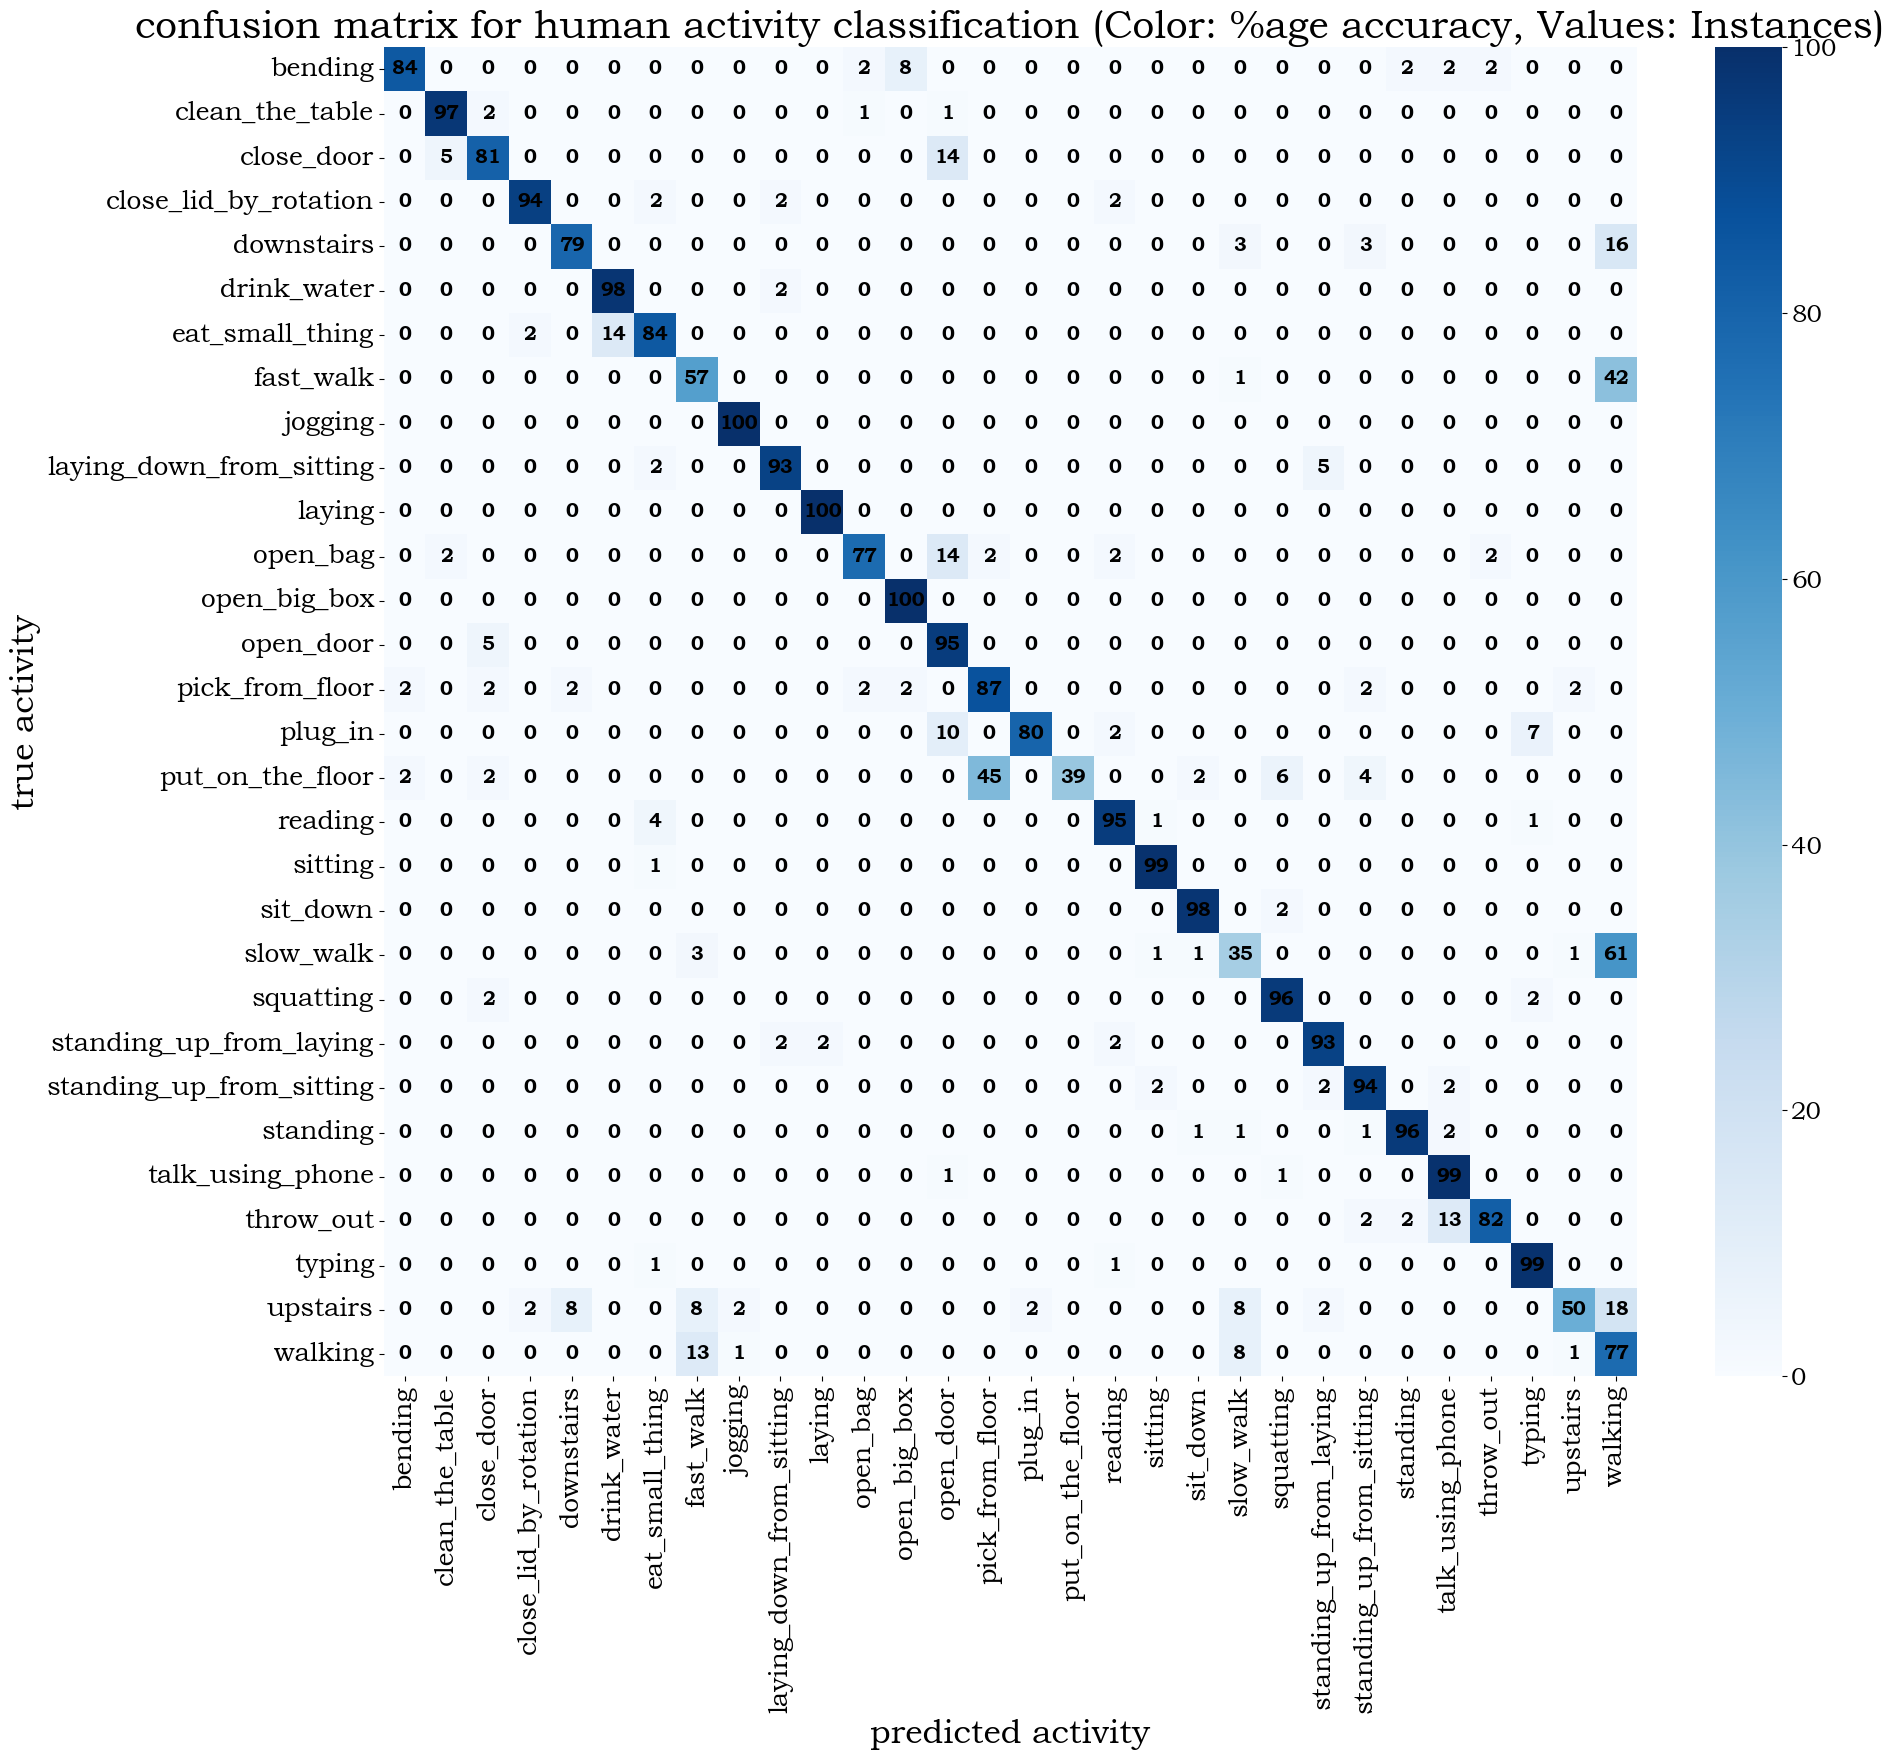

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.font_manager as fm

# Load Bookman Old Style from path if available
font_path = r"C:\Users\Malik Haider\AppData\Local\Microsoft\Windows\Fonts\BOOKOS.TTF"
try:
    bookman_font = fm.FontProperties(fname=font_path)
except:
    bookman_font = None

# Define activity labels
activity_names = [
    'bending', 'clean_the_table', 'close_door', 'close_lid_by_rotation',
    'downstairs', 'drink_water', 'eat_small_thing', 'fast_walk',
    'jogging', 'laying_down_from_sitting', 'laying', 'open_bag',
    'open_big_box', 'open_door', 'pick_from_floor', 'plug_in',
    'put_on_the_floor', 'reading', 'sitting', 'sit_down',
    'slow_walk', 'squatting', 'standing_up_from_laying',
    'standing_up_from_sitting', 'standing', 'talk_using_phone',
    'throw_out', 'typing', 'upstairs', 'walking'
]

# Normalize and convert to integer percentages
conf_matrix_percent = np.round(conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100).astype(int)
conf_matrix_count = conf_matrix.astype(int)

# Plot the heatmap
plt.figure(figsize=(20, 18))
ax = sns.heatmap(
    conf_matrix_percent,
    # annot=conf_matrix_count,
    annot=True,
    fmt='d',  # Integer format
    cmap='Blues',
    xticklabels=activity_names,
    yticklabels=activity_names,
    cbar=True,
    vmin=0, vmax=100,
    annot_kws={"size": 14, "color": "black", "weight": "bold"}
)

# Apply font styling
if bookman_font:
    plt.title('confusion matrix for human activity classification (Color: %age accuracy, Values: Instances)', fontproperties=bookman_font, fontsize=28)
    plt.xlabel('predicted activity', fontproperties=bookman_font, fontsize=24)
    plt.ylabel('true activity', fontproperties=bookman_font, fontsize=24)
    ax.set_xticklabels(activity_names, fontproperties=bookman_font, fontsize=19, rotation=90)
    ax.set_yticklabels(activity_names, fontproperties=bookman_font, fontsize=19, rotation=0)
else:
    plt.title('confusion matrix for human activity classification ', fontsize=28, fontname='serif')
    plt.xlabel('predicted activity', fontsize=24, fontname='serif')
    plt.ylabel('true activity', fontsize=24, fontname='serif')
    ax.set_xticklabels(activity_names, fontsize=14, rotation=90)
    ax.set_yticklabels(activity_names, fontsize=14, rotation=0)

plt.tight_layout()
plt.savefig(r'C:\Users\Malik Haider\Downloads\Model_Results\Confusion_Matrix_Counts_Box_Values_HighRes.jpg', dpi=600)
plt.show()

In [46]:
sample_index = 0  # Change this to test other samples

# Extract a single test sample
X_sample = [feature[sample_index:sample_index+1] for feature in X_test_features]

# Predict
sample_pred_probs = model_dp.predict(X_sample)
sample_pred = np.argmax(sample_pred_probs, axis=1)

print(f"Predicted class: {sample_pred[0]}")
print(f"Actual Class: {y_test[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
Predicted class: 10
Actual Class: 10
